In [32]:
import xarray as xr
import numpy as np

select_lonw=106
select_lone=110
select_lats=26
select_latn=30
select_lon = np.linspace(select_lonw, select_lone, (select_lone-select_lonw)*1+1)
select_lat = np.linspace(select_lats, select_latn, (select_latn-select_lats)*1+1)


In [33]:
# 为了能与观测数据data1比对
# 从超分辨率数据data2中挑选出25个站点的数据data3
# data_comparison第一行是低分辨率数据,第二行是高分辨率数据,每一列是一天

data_comparison = np.zeros([2,31,25])

for i in range(0,31):
    data1 = xr.open_dataset(f'./Data/DataResults/ResultEval/{i:02d}_pre_lr.nc')
    data2 = xr.open_dataset(f'./Data/DataResults/ResultEval/{i:02d}_pre_sr.nc')  
    data3 = data2.interp(lon=select_lon, lat=select_lat,method='linear')

    data_comparison[0,i,:] = data1['tp'].values.reshape(25, )
    data_comparison[1,i,:] = data3['tp'].values.reshape(25, )
    


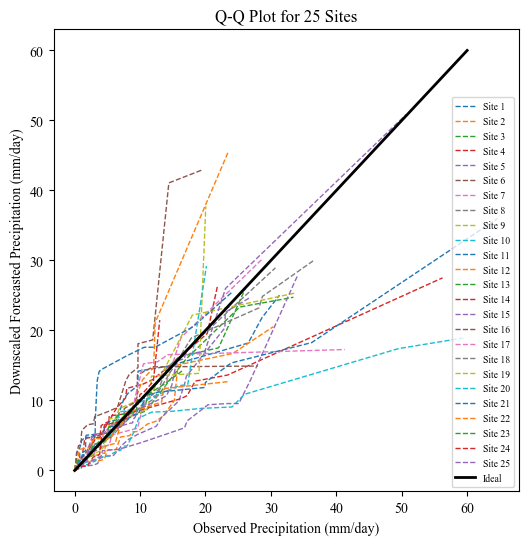

In [38]:
## 画25个站点的Q-Q图
import matplotlib.pyplot as plt

num_sites = data_comparison.shape[2]

plt.figure(figsize=(6, 6))
plt.rcParams['font.family'] = 'Times New Roman'
for site in range(num_sites):
    actual_data = data_comparison[0, :, site]
    predicted_data = data_comparison[1, :, site]
    
    actual_sorted = np.sort(actual_data)
    predicted_sorted = np.sort(predicted_data)
    plt.plot(actual_sorted, predicted_sorted, '--', label=f'Site {site+1}', linewidth=1)

plt.plot([0, 60], [0, 60], 'k-', label='Ideal', linewidth=2)
plt.xlabel('Observed Precipitation (mm/day)')
plt.ylabel('Downscaled Forecasted Precipitation (mm/day)')
plt.title(f'Q-Q Plot for {site+1} Sites')
plt.legend(fontsize='7')
plt.show()


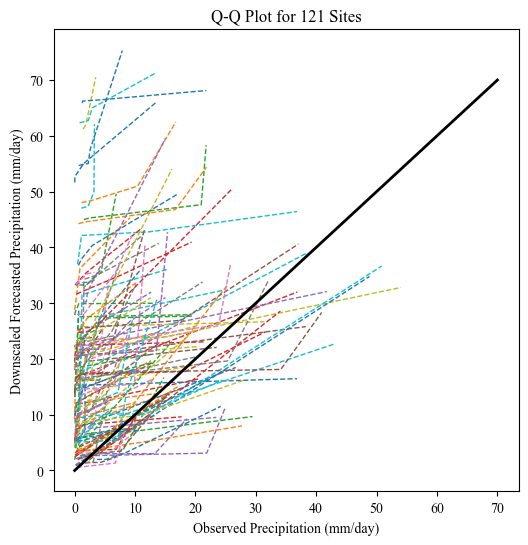

In [39]:
## 画121个站点的Q-Q图

import matplotlib.pyplot as plt
import xarray as xr
import numpy as np

select_lonw=106
select_lone=110
select_lats=26
select_latn=30
select_lon = np.linspace(select_lonw, select_lone, 11)
select_lat = np.linspace(select_lats, select_latn, 11)

data_comparison = np.zeros([2,4,121])

for i in range(0,4):
    data1 = xr.open_dataset(f'./Data/DataResults/ResultObj/{i:02d}_pre_lr.nc')
    data2 = xr.open_dataset(f'./Data/DataResults/ResultObj/{i:02d}_pre_sr.nc')  
    data3 = data2.interp(lon=select_lon, lat=select_lat,method='linear')

    data_comparison[0,i,:] = data1['tp'].values.reshape(121, )*1000
    data_comparison[1,i,:] = data3['tp'].values.reshape(121, )*1000
    

## 画121个站点的Q-Q图
num_sites = data_comparison.shape[2]

plt.figure(figsize=(6, 6))
plt.rcParams['font.family'] = 'Times New Roman'
for site in range(num_sites):
    actual_data = data_comparison[0, :, site]
    predicted_data = data_comparison[1, :, site]
    
    actual_sorted = np.sort(actual_data)
    predicted_sorted = np.sort(predicted_data)
    plt.plot(actual_sorted, predicted_sorted, '--', label=f'Site {site+1}', linewidth=1)

plt.plot([0, 70], [0, 70], 'k-', label='Ideal', linewidth=2)
plt.xlabel('Observed Precipitation (mm/day)')
plt.ylabel('Downscaled Forecasted Precipitation (mm/day)')
plt.title(f'Q-Q Plot for {site+1} Sites')
# plt.legend(fontsize='3')
plt.show()